In [1]:
# %load_ext autoreload
# %autoreload 2
# import os
# from pathlib import Path

# print(Path().cwd())
# os.chdir(Path().cwd().parent)
# print(Path().cwd())

# Wavelet

In [2]:
# from pyquantus.utc.analysis import Hscan

# wavelet_params_1 = {
#     'order': 2, 
#     'fs': 30e6, 
#     'sigma': 0.11e-6, 
#     'wavelet_duration': 3e-6,
#     'visualize': True
# }

# wavelet_params_2 = {
#     'order': 8, 
#     'fs': 30e6, 
#     'sigma': 0.11e-6, 
#     'wavelet_duration': 3e-6,
#     'visualize': True
# }

# Hscan.GaussinaHermiteWavelet(**wavelet_params_1)
# Hscan.GaussinaHermiteWavelet(**wavelet_params_2)

# Read sample data

In [3]:
# from pyquantus.parse.clarius import ClariusParser

# rf_path = r'd:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0_extracted\2025-01-28t07-20-59+0000_rf.raw'
# rf_tgc_path = r'd:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0_extracted\2025-01-28T07-20-59+0000_env.tgc.yml'
# info_path = r'd:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0_extracted\2025-01-28T07-20-59+0000_rf.yml'

# data_obj = ClariusParser(rf_path, rf_tgc_path, info_path, visualize=True) # image = phantom for now

In [4]:
# from pyquantus.parse.clarius import ClariusParser

# rf_path = r'D:\Omid\0_samples\Jonas_Bowel\test\UKDIBD001CD2TI\raw_0_0_extracted\2024-08-21t07-04-33+0000_rf.raw'
# rf_tgc_path = r'D:\Omid\0_samples\Jonas_Bowel\test\UKDIBD001CD2TI\raw_0_0_extracted\2024-08-21t07-04-33+0000_env.tgc.yml'
# info_path = r'D:\Omid\0_samples\Jonas_Bowel\test\UKDIBD001CD2TI\raw_0_0_extracted\2024-08-21t07-04-33+0000_rf.yml'

# data_obj = ClariusParser(rf_path, rf_tgc_path, info_path, visualize=True) # image = phantom for now

In [5]:
# signal_nd = data_obj.clarius_data_struct.rf
# print(signal_nd.shape)

# import numpy as np
# # Save signal_nd as a numpy array file
# np.save('signal_nd.npy', signal_nd)



In [6]:
# import numpy as np

# # Load the signal_nd from the saved numpy array file
# signal_nd = np.load('signal_nd.npy')

# print(signal_nd.shape)

# signal_nd = signal_nd[:, :, :]

In [7]:
#signal_nd = data_obj.rf_no_tgc_raw_data_3d
# signal_nd = data_obj.rf_raw_data_3d

# print(signal_nd.shape)


# Hscan

In [8]:
# from pyquantus.utc.analysis import Hscan

# hscan_params = {
#     'signal_nd': signal_nd,
#     'row_axis': 2,
#     'signal_axis': 1,
#     'frame_axis': 0,
#     'wavelet_GHx_params_1': {
#         'order': 2, 
#         'fs': 30e6, 
#         'sigma': 0.11e-6, 
#         'wavelet_duration': 3e-6,
#         'visualize': False
#     },
#     'wavelet_GHx_params_2': {
#         'order': 8, 
#         'fs': 30e6, 
#         'sigma': 0.11e-6, 
#         'wavelet_duration': 3e-6,
#         'visualize': False
#     }
# }

# hscan_obj = Hscan(**hscan_params)


In [9]:
# print(hscan_obj.convolved_signal_with_ghx_1_nd.shape)
# print(hscan_obj.convolved_signal_with_ghx_2_nd.shape)
# print(hscan_obj.convolved_signal_with_ghx_1_envelope_nd.shape)
# print(hscan_obj.convolved_signal_with_ghx_2_envelope_nd.shape)


In [10]:
# from pyquantus.utc.results import HscanPostProcessing

# settings = {
#     'method': 'method_1',           # method_1, method_2, method_3, method_4, method_5, method_6
#     'visualize_wavelets': False,    # True, False
#     'visualize_signal': False,      # True, False
#     'visualize_hscan': True,        # True, False
#     'visualize_rotated_flip': False, # True, False
#     'clip_fact': 0.95,              # 0-1
#     'dyn_range': 60,                # 0-100
# }

# HscanPostProcessing(hscan_obj, **settings)

# CFS

In [11]:
import numpy as np

# Load the signal_nd from the saved numpy array file
signal_nd = np.load('signal_nd.npy')

print(signal_nd.shape)

signal_1d = signal_nd[0, :, 0]
print(signal_1d.shape)


(34, 2928, 192)
(2928,)


In [12]:
# signal_1d = data_obj.rf_raw_data_3d[0, :, 0]

In [13]:
from pyquantus.utc.analysis import DepthTimeArrayGenerator

depth_time_obj = DepthTimeArrayGenerator(
    signal_len=len(signal_1d),
    sampling_frequency_MHz=30,
    speed_of_sound_m_s=1540,
)

print("depth_array: ", depth_time_obj.depth_array_cm)
print("time_array: ", depth_time_obj.time_array_s)

depth_array:  [0.00000000e+00 2.56666667e-03 5.13333333e-03 ... 7.50750000e+00
 7.51006667e+00 7.51263333e+00]
time_array:  [0.00000000e+00 3.33333333e-08 6.66666667e-08 ... 9.75000000e-05
 9.75333333e-05 9.75666667e-05]


TypeError: Dimensions of C (64, 47) are incompatible with X (46) and/or Y (64); see help(pcolormesh)

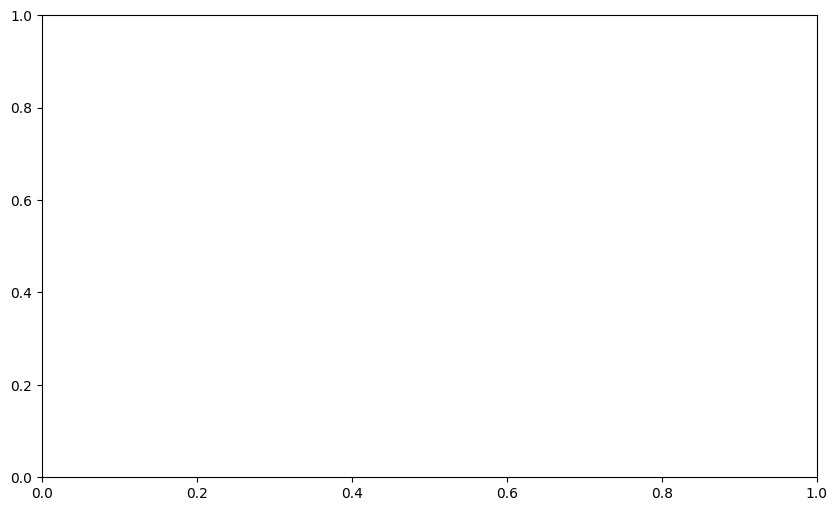

In [14]:
from pyquantus.utc.analysis import CentralFrequencyShift

# Create instance
cfs = CentralFrequencyShift(
    signal_1d=signal_1d,
    sampling_frequency_MHz=30,
    time_array_s=depth_time_obj.time_array_s,
    depth_array_cm=depth_time_obj.depth_array_cm,  
    stft_params={'nperseg': 128,
                 'overlap': 64}  
)

